<a href="https://colab.research.google.com/github/MUKESHV17/NLP_Seasonal-Energy-Consumption-Forecasting-Using-SARIMAX/blob/main/NLP_Seasonal_Energy_Consumption_Forecasting_Using_SARIMAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv('/content/AEP_hourly.csv')

# Display the first 5 rows of the DataFrame
print('First 5 rows of the DataFrame:')
print(df.head())

# Print the column names of the DataFrame
print('\nColumn names:')
print(df.columns)

# Print the data types of each column in the DataFrame
print('\nData types of each column:')
print(df.dtypes)

First 5 rows of the DataFrame:
              Datetime   AEP_MW
0  2004-12-31 01:00:00  13478.0
1  2004-12-31 02:00:00  12865.0
2  2004-12-31 03:00:00  12577.0
3  2004-12-31 04:00:00  12517.0
4  2004-12-31 05:00:00  12670.0

Column names:
Index(['Datetime', 'AEP_MW'], dtype='object')

Data types of each column:
Datetime     object
AEP_MW      float64
dtype: object


In [2]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.set_index('Datetime')

# Resample to monthly frequency and sum 'AEP_MW'
df_monthly = df['AEP_MW'].resample('M').sum().to_frame()

# Check for missing values after resampling
print('\nMissing values in df_monthly after resampling:')
print(df_monthly.isnull().sum())

# Handle missing values if any (e.g., forward fill)
if df_monthly.isnull().sum().any():
    print('\nHandling missing values in df_monthly with forward fill...')
    df_monthly = df_monthly.fillna(method='ffill')
    # If there are still NaNs at the beginning (no previous value), backward fill
    if df_monthly.isnull().sum().any():
        print('Handling remaining missing values with backward fill...')
        df_monthly = df_monthly.fillna(method='bfill')

print('\nFirst 5 rows of the monthly DataFrame:')
print(df_monthly.head())

print('\nInfo of the monthly DataFrame:')
print(df_monthly.info())

print('\nMissing values in df_monthly after handling:')
print(df_monthly.isnull().sum())


Missing values in df_monthly after resampling:
AEP_MW    0
dtype: int64

First 5 rows of the monthly DataFrame:
                AEP_MW
Datetime              
2004-10-31  10349073.0
2004-11-30  10677917.0
2004-12-31  12452864.0
2005-01-31  12735114.0
2005-02-28  11085745.0

Info of the monthly DataFrame:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 167 entries, 2004-10-31 to 2018-08-31
Freq: ME
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AEP_MW  167 non-null    float64
dtypes: float64(1)
memory usage: 2.6 KB
None

Missing values in df_monthly after handling:
AEP_MW    0
dtype: int64


/tmp/ipython-input-3223406842.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df['AEP_MW'].resample('M').sum().to_frame()


In [4]:
df_monthly = df['AEP_MW'].resample('ME').sum().to_frame()

# Check for missing values after resampling
print('\nMissing values in df_monthly after resampling:')
print(df_monthly.isnull().sum())

# Handle missing values if any (e.g., forward fill)
if df_monthly.isnull().sum().any():
    print('\nHandling missing values in df_monthly with forward fill...')
    df_monthly = df_monthly.fillna(method='ffill')
    # If there are still NaNs at the beginning (no previous value), backward fill
    if df_monthly.isnull().sum().any():
        print('Handling remaining missing values with backward fill...')
        df_monthly = df_monthly.fillna(method='bfill')

print('\nFirst 5 rows of the monthly DataFrame:')
print(df_monthly.head())

print('\nInfo of the monthly DataFrame:')
print(df_monthly.info())

print('\nMissing values in df_monthly after handling:')
print(df_monthly.isnull().sum())


Missing values in df_monthly after resampling:
AEP_MW    0
dtype: int64

First 5 rows of the monthly DataFrame:
                AEP_MW
Datetime              
2004-10-31  10349073.0
2004-11-30  10677917.0
2004-12-31  12452864.0
2005-01-31  12735114.0
2005-02-28  11085745.0

Info of the monthly DataFrame:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 167 entries, 2004-10-31 to 2018-08-31
Freq: ME
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AEP_MW  167 non-null    float64
dtypes: float64(1)
memory usage: 2.6 KB
None

Missing values in df_monthly after handling:
AEP_MW    0
dtype: int64


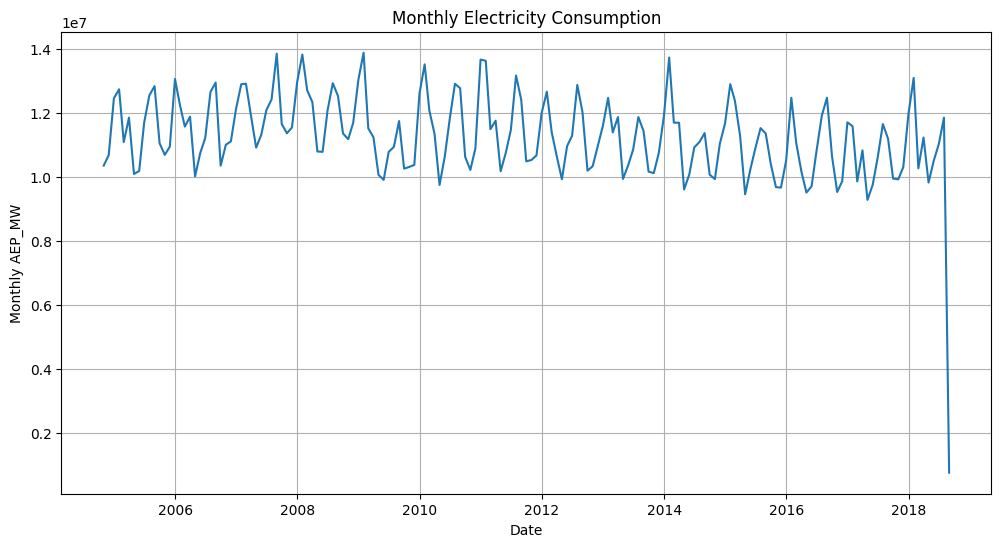

<Figure size 1200x800 with 0 Axes>

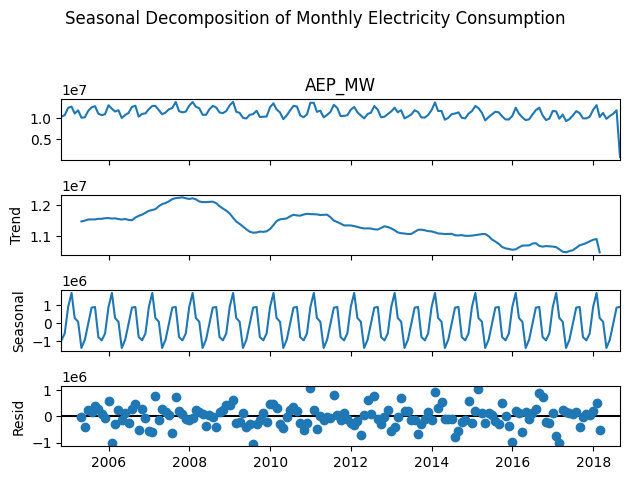

In [5]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Set figure size for better visualization
plt.figure(figsize=(12, 6))
plt.plot(df_monthly['AEP_MW'])
plt.xlabel('Date')
plt.ylabel('Monthly AEP_MW')
plt.title('Monthly Electricity Consumption')
plt.grid(True)
plt.show()

# Perform seasonal decomposition
decomposition = seasonal_decompose(df_monthly['AEP_MW'], model='additive', period=12)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.suptitle('Seasonal Decomposition of Monthly Electricity Consumption', y=1.02) # Adjust suptitle position
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent overlap
plt.show()

In [8]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(series, name=''):
    """
    Performs the Augmented Dickey-Fuller test and prints the results.
    """
    print(f'Augmented Dickey-Fuller Test on "{name}" Series:')
    result = adfuller(series, autolag='AIC')
    labels = ['ADF Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result[0:4], labels):
        print(f'{label}: {value:.4f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.4f}')

    if result[1] <= 0.05:
        print(f'Conclusion: The "{name}" series is Stationary (p-value = {result[1]:.4f} <= 0.05).\n')
        return True
    else:
        print(f'Conclusion: The "{name}" series is Non-Stationary (p-value = {result[1]:.4f} > 0.05).\n')
        return False

# Apply ADF test to the original monthly series
is_stationary = adfuller_test(df_monthly['AEP_MW'], name='Original Monthly AEP_MW')

# If non-stationary, apply first-order differencing and re-test
if not is_stationary:
    print('Applying first-order differencing...')
    # Calculate the difference and assign to a new column. This will have a NaN at the first position.
    df_monthly['AEP_MW_diff'] = df_monthly['AEP_MW'].diff()
    # When performing the ADF test, explicitly drop NaNs from the differenced series
    adfuller_test(df_monthly['AEP_MW_diff'].dropna(), name='Differenced Monthly AEP_MW')
else:
    print('Series is already stationary, no differencing needed for this step.')

Augmented Dickey-Fuller Test on "Original Monthly AEP_MW" Series:
ADF Statistic: 0.1099
p-value: 0.9667
#Lags Used: 12.0000
Number of Observations Used: 154.0000
Critical Values:
	1%: -3.4735
	5%: -2.8805
	10%: -2.5769
Conclusion: The "Original Monthly AEP_MW" series is Non-Stationary (p-value = 0.9667 > 0.05).

Applying first-order differencing...
Augmented Dickey-Fuller Test on "Differenced Monthly AEP_MW" Series:
ADF Statistic: -3.6040
p-value: 0.0057
#Lags Used: 11.0000
Number of Observations Used: 154.0000
Critical Values:
	1%: -3.4735
	5%: -2.8805
	10%: -2.5769
Conclusion: The "Differenced Monthly AEP_MW" series is Stationary (p-value = 0.0057 <= 0.05).



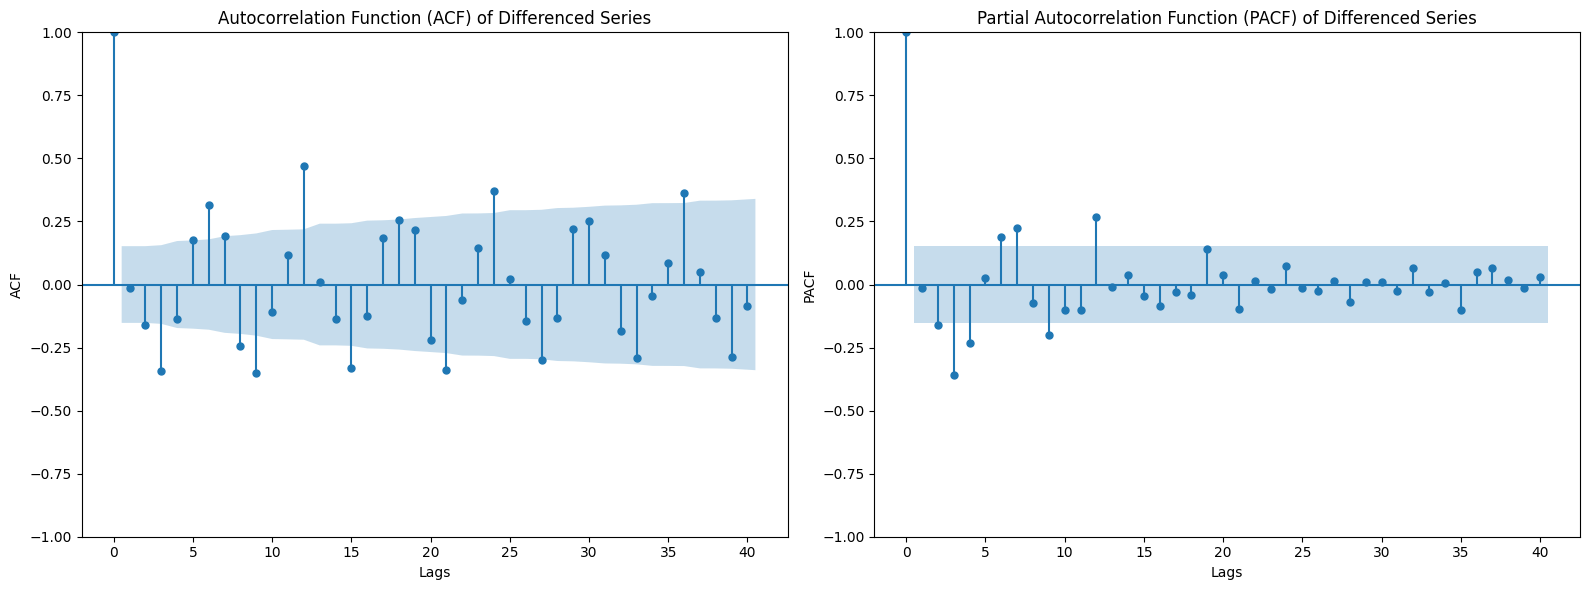

In [9]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot ACF of the differenced series
plot_acf(df_monthly['AEP_MW_diff'].dropna(), ax=axes[0], lags=40)
axes[0].set_title('Autocorrelation Function (ACF) of Differenced Series')
axes[0].set_xlabel('Lags')
axes[0].set_ylabel('ACF')

# Plot PACF of the differenced series
plot_pacf(df_monthly['AEP_MW_diff'].dropna(), ax=axes[1], lags=40)
axes[1].set_title('Partial Autocorrelation Function (PACF) of Differenced Series')
axes[1].set_xlabel('Lags')
axes[1].set_ylabel('PACF')

plt.tight_layout()
plt.show()

In [10]:
split_ratio = 0.8
split_point = int(len(df_monthly) * split_ratio)

# Split data into training and testing sets
train_df = df_monthly.iloc[:split_point]
test_df = df_monthly.iloc[split_point:]

print(f"Training set has {len(train_df)} observations from {train_df.index.min().strftime('%Y-%m-%d')} to {train_df.index.max().strftime('%Y-%m-%d')}")
print(f"Testing set has {len(test_df)} observations from {test_df.index.min().strftime('%Y-%m-%d')} to {test_df.index.max().strftime('%Y-%m-%d')}")


Training set has 133 observations from 2004-10-31 to 2015-10-31
Testing set has 34 observations from 2015-11-30 to 2018-08-31


In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMA orders based on analysis (p, d, q) and (P, D, Q, S)
# d=1 because we differenced the series once to make it stationary
# For seasonal, D=0 because the initial seasonal decomposition doesn't show a clear need for seasonal differencing, but will be re-evaluated
# Based on typical monthly data with seasonal patterns
order = (1, 1, 1)  # (p, d, q) - non-seasonal orders
seasonal_order = (1, 0, 1, 12) # (P, D, Q, S) - seasonal orders (D=0 for now)

# Instantiate the SARIMAX model
# We are not including an exogenous variable in this step, as per the instructions
model = SARIMAX(train_df['AEP_MW'], order=order, seasonal_order=seasonal_order)

# Fit the SARIMAX model to the training data
sarimax_results = model.fit()

# Print the model summary
print(sarimax_results.summary())


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                      
Dep. Variable:                             AEP_MW   No. Observations:                  133
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -1988.615
Date:                            Tue, 24 Feb 2026   AIC                           3987.231
Time:                                    17:30:19   BIC                           4001.645
Sample:                                10-31-2004   HQIC                          3993.088
                                     - 10-31-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6929      0.163      4.245      0.000       0.373       1.013
ma.L1         -0.8143      0.132   

In [12]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMA orders based on analysis (p, d, q) and (P, D, Q, S)
# d=1 because we differenced the series once to make it stationary
# Changing D from 0 to 1 to account for seasonal differencing, which is often necessary for monthly data with strong seasonality.
# Based on typical monthly data with seasonal patterns
order = (1, 1, 1)  # (p, d, q) - non-seasonal orders
seasonal_order = (1, 1, 1, 12) # (P, D, Q, S) - seasonal orders (D=1 for seasonal differencing)

# Instantiate the SARIMAX model
# We are not including an exogenous variable in this step, as per the instructions
model = SARIMAX(train_df['AEP_MW'], order=order, seasonal_order=seasonal_order,
                enforce_stationarity=False, enforce_invertibility=False) # Adding these to help with convergence if warnings persist

# Fit the SARIMAX model to the training data
sarimax_results = model.fit()

# Print the model summary
print(sarimax_results.summary())


                                     SARIMAX Results                                      
Dep. Variable:                             AEP_MW   No. Observations:                  133
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1551.391
Date:                            Tue, 24 Feb 2026   AIC                           3112.782
Time:                                    17:30:39   BIC                           3126.099
Sample:                                10-31-2004   HQIC                          3118.180
                                     - 10-31-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1573      0.176      0.892      0.372      -0.188       0.503
ma.L1         -0.6941      0.091   

/tmp/ipython-input-1539271577.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['predictions'] = predictions


Test DataFrame with predictions:
                AEP_MW  AEP_MW_diff   predictions
Datetime                                         
2015-11-30   9663563.0     -15037.0  1.081261e+07
2015-12-31  10507653.0     844090.0  1.166089e+07
2016-01-31  12469996.0    1962343.0  1.305646e+07
2016-02-29  11063189.0   -1406807.0  1.200411e+07
2016-03-31  10169851.0    -893338.0  1.135259e+07


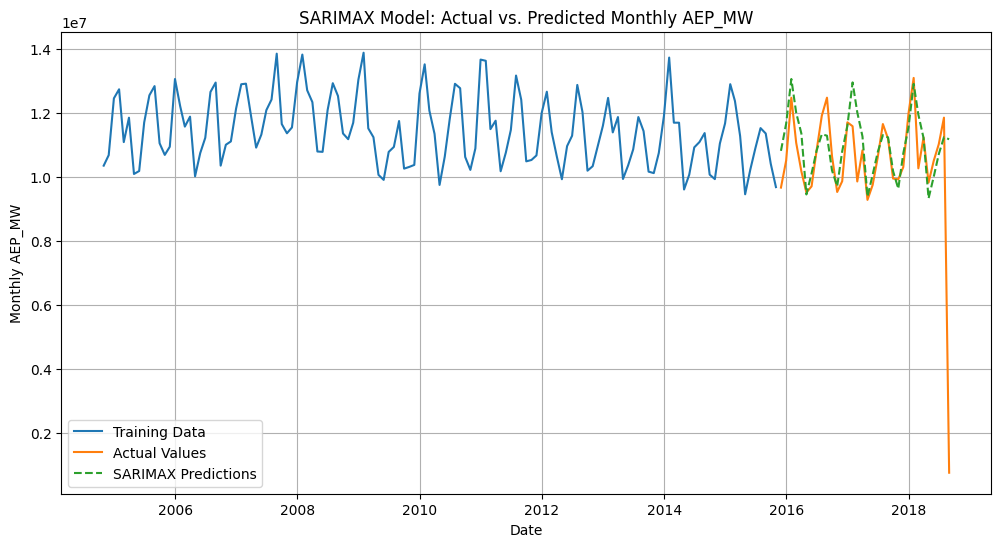

In [13]:
start = len(train_df)
end = len(df_monthly) - 1

# Generate predictions
predictions = sarimax_results.predict(start=start, end=end, dynamic=False)

# Assign the predictions to a new column in the test_df for comparison
test_df['predictions'] = predictions

# Display the first few rows of the test_df with predictions
print('Test DataFrame with predictions:')
print(test_df.head())

# Plot the actual vs. predicted values for a visual comparison
plt.figure(figsize=(12, 6))
plt.plot(train_df['AEP_MW'], label='Training Data')
plt.plot(test_df['AEP_MW'], label='Actual Values')
plt.plot(test_df['predictions'], label='SARIMAX Predictions', linestyle='--')
plt.title('SARIMAX Model: Actual vs. Predicted Monthly AEP_MW')
plt.xlabel('Date')
plt.ylabel('Monthly AEP_MW')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
split_ratio = 0.8
split_point = int(len(df_monthly) * split_ratio)

# Split data into training and testing sets
train_df = df_monthly.iloc[:split_point].copy()
test_df = df_monthly.iloc[split_point:].copy()

print(f"Training set has {len(train_df)} observations from {train_df.index.min().strftime('%Y-%m-%d')} to {train_df.index.max().strftime('%Y-%m-%d')}")
print(f"Testing set has {len(test_df)} observations from {test_df.index.min().strftime('%Y-%m-%d')} to {test_df.index.max().strftime('%Y-%m-%d')}")

Training set has 133 observations from 2004-10-31 to 2015-10-31
Testing set has 34 observations from 2015-11-30 to 2018-08-31


Test DataFrame with predictions:
                AEP_MW  AEP_MW_diff   predictions
Datetime                                         
2015-11-30   9663563.0     -15037.0  1.081261e+07
2015-12-31  10507653.0     844090.0  1.166089e+07
2016-01-31  12469996.0    1962343.0  1.305646e+07
2016-02-29  11063189.0   -1406807.0  1.200411e+07
2016-03-31  10169851.0    -893338.0  1.135259e+07


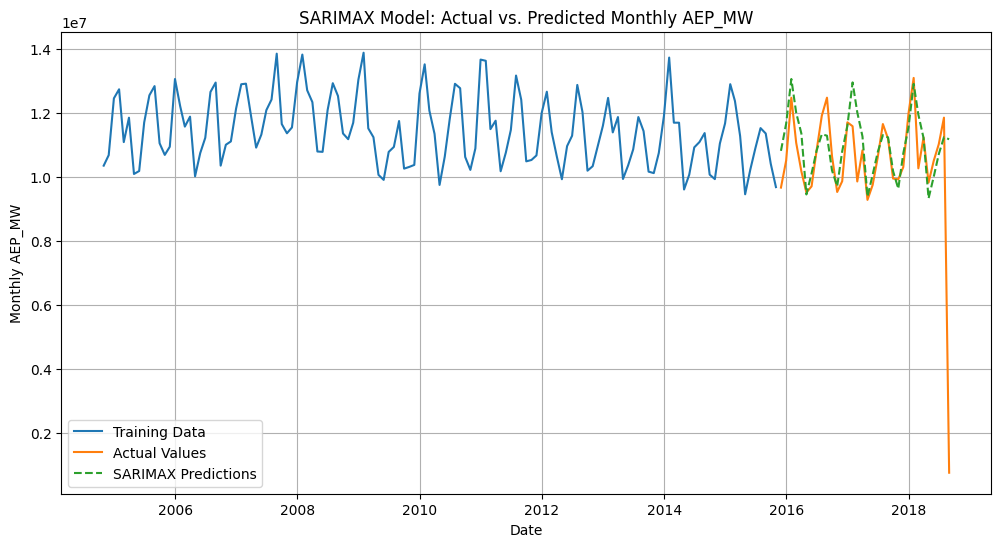

In [15]:
start = len(train_df)
end = len(df_monthly) - 1

# Generate predictions
predictions = sarimax_results.predict(start=start, end=end, dynamic=False)

# Assign the predictions to a new column in the test_df for comparison
test_df['predictions'] = predictions

# Display the first few rows of the test_df with predictions
print('Test DataFrame with predictions:')
print(test_df.head())

# Plot the actual vs. predicted values for a visual comparison
plt.figure(figsize=(12, 6))
plt.plot(train_df['AEP_MW'], label='Training Data')
plt.plot(test_df['AEP_MW'], label='Actual Values')
plt.plot(test_df['predictions'], label='SARIMAX Predictions', linestyle='--')
plt.title('SARIMAX Model: Actual vs. Predicted Monthly AEP_MW')
plt.xlabel('Date')
plt.ylabel('Monthly AEP_MW')
plt.legend()
plt.grid(True)
plt.show()

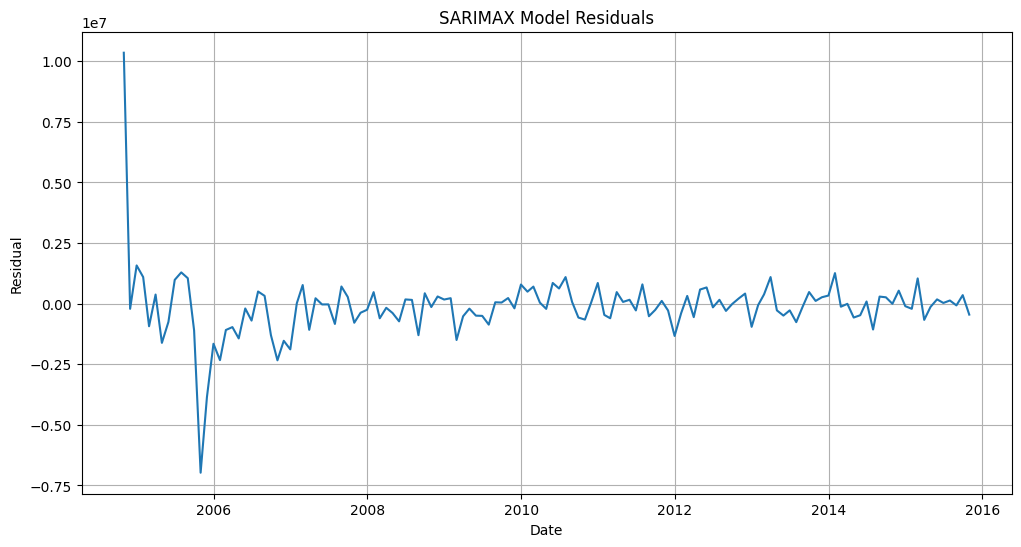

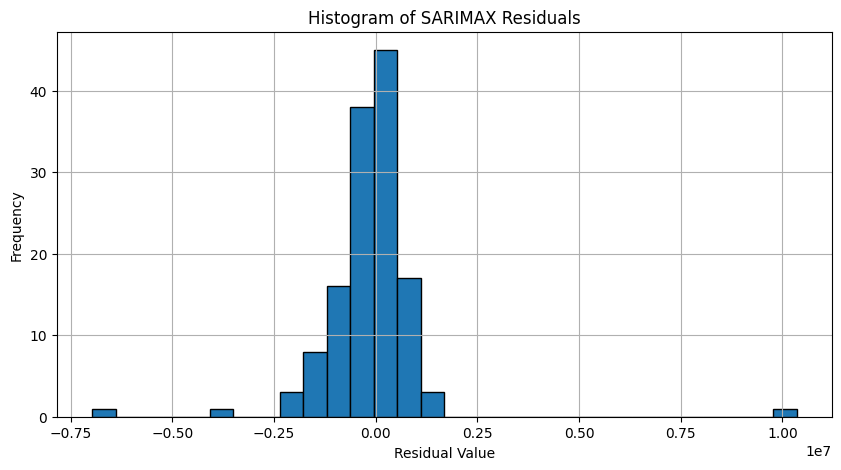

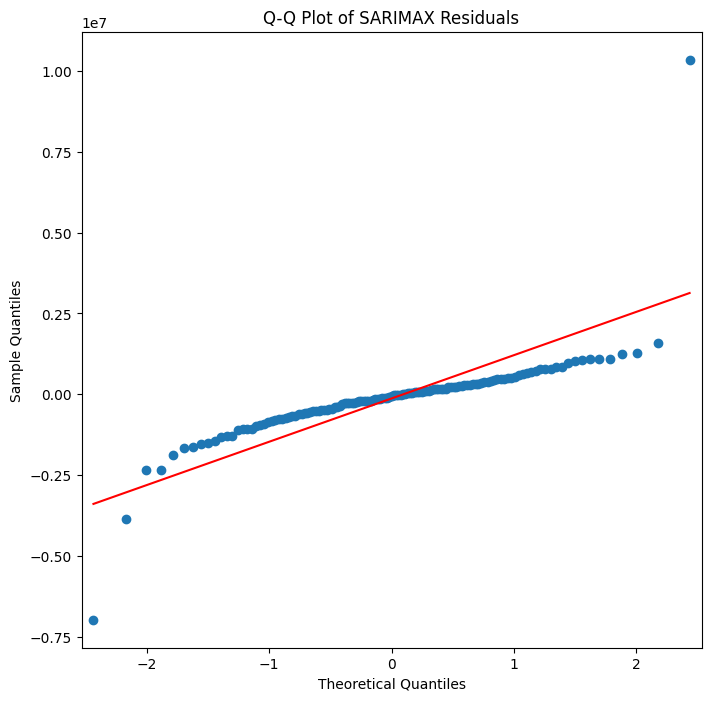

In [17]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 1. Plot the residuals
plt.figure(figsize=(12, 6))
plt.plot(sarimax_results.resid)
plt.title('SARIMAX Model Residuals')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.grid(True)
plt.show()

# 2. Plot the histogram of the residuals
plt.figure(figsize=(10, 5))
plt.hist(sarimax_results.resid, bins=30, edgecolor='black')
plt.title('Histogram of SARIMAX Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 3. Generate a Q-Q plot of the residuals to check for normality
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
sm.qqplot(sarimax_results.resid, line='s', ax=ax)
ax.set_title('Q-Q Plot of SARIMAX Residuals')
plt.show()


In [18]:
import statsmodels.api as sm

# 4. Perform the Ljung-Box test on the residuals to check for white noise
# The Ljung-Box test checks if autocorrelations are different from zero.
# A high p-value (e.g., > 0.05) indicates that the residuals are independently distributed (white noise).

# Dropping the first element as residuals start from the first differenced observation.
# Also handling any NaNs that might arise from initial differencing during model fitting.
# Using the raw residuals as produced by sarimax_results.resid, dropping any potential NaNs at the beginning.
ljung_box_test_results = sm.stats.acorr_ljungbox(sarimax_results.resid.dropna(), lags=[12, 24, 36], return_df=True)

print('\nLjung-Box Test Results on Residuals:')
print(ljung_box_test_results)

# Interpretation of Ljung-Box test results (optional, but good for understanding)
print('\nInterpretation of Ljung-Box Test:')
for lag in ljung_box_test_results.index:
    p_value = ljung_box_test_results.loc[lag, 'lb_pvalue']
    if p_value > 0.05:
        print(f'At lag {lag}: p-value = {p_value:.4f} > 0.05. Residuals are independently distributed (white noise).')
    else:
        print(f'At lag {lag}: p-value = {p_value:.4f} <= 0.05. Residuals are not independently distributed (not white noise).')



Ljung-Box Test Results on Residuals:
      lb_stat  lb_pvalue
12  21.042053   0.049768
24  31.244854   0.146847
36  36.584468   0.441536

Interpretation of Ljung-Box Test:
At lag 12: p-value = 0.0498 <= 0.05. Residuals are not independently distributed (not white noise).
At lag 24: p-value = 0.1468 > 0.05. Residuals are independently distributed (white noise).
At lag 36: p-value = 0.4415 > 0.05. Residuals are independently distributed (white noise).


In [19]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Custom MAPE function since it's not directly in older sklearn versions
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate evaluation metrics
mae = mean_absolute_error(test_df['AEP_MW'], test_df['predictions'])
rmse = np.sqrt(mean_squared_error(test_df['AEP_MW'], test_df['predictions']))
mape = mean_absolute_percentage_error(test_df['AEP_MW'], test_df['predictions'])

# Print the results
print(f"\nMean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Error (MAE): 866383.08
Root Mean Squared Error (RMSE): 1941622.14
Mean Absolute Percentage Error (MAPE): 45.86%


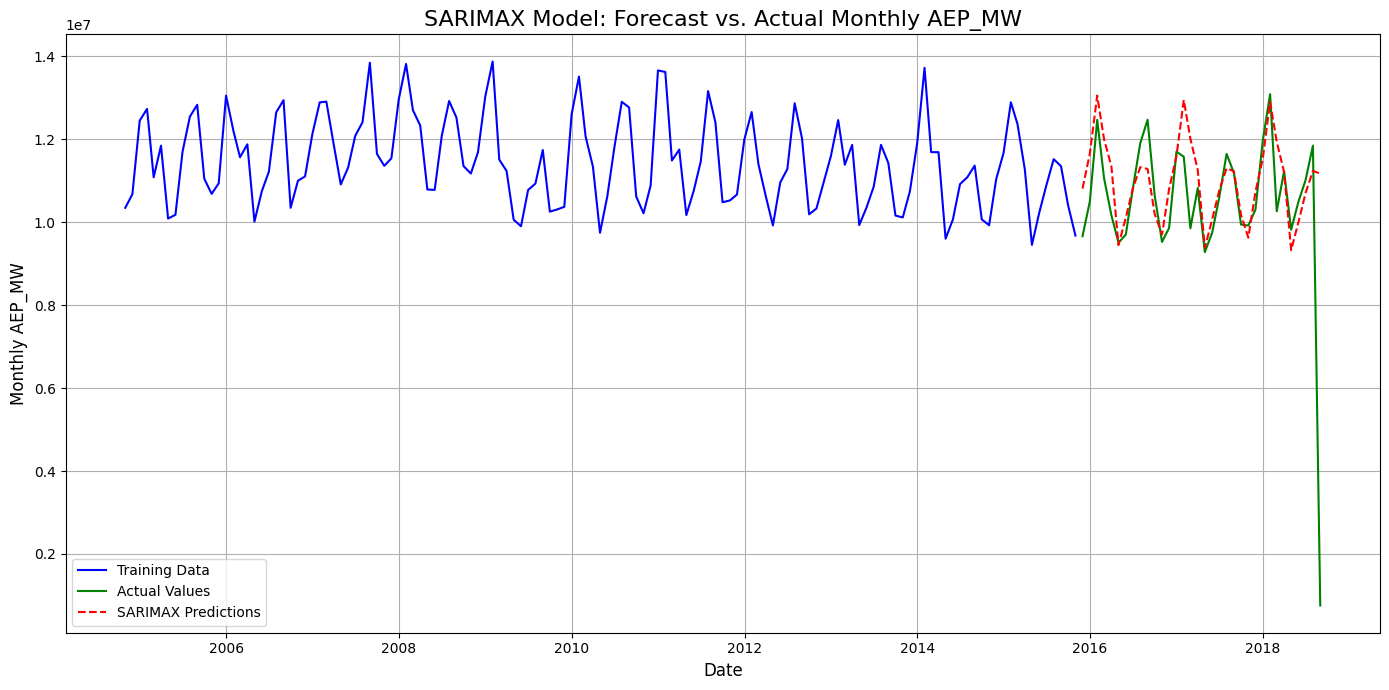

In [20]:
import matplotlib.pyplot as plt

# Create a figure with a specified size
plt.figure(figsize=(14, 7))

# Plot the historical training data
plt.plot(train_df['AEP_MW'], label='Training Data', color='blue')

# Plot the actual values from the test set
plt.plot(test_df['AEP_MW'], label='Actual Values', color='green')

# Plot the SARIMAX model's forecasts
plt.plot(test_df['predictions'], label='SARIMAX Predictions', color='red', linestyle='--')

# Add title and labels
plt.title('SARIMAX Model: Forecast vs. Actual Monthly AEP_MW', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Monthly AEP_MW', fontsize=12)

# Add a legend to distinguish the lines
plt.legend(fontsize=10)

# Add a grid for better readability
plt.grid(True)

# Enhance layout to prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()